*이 프로젝트의 주 목적은 캘리포니아 지역 주택의 여러 특성을 사용해 중간 가격을 예측하는 것이다.*

# 설정

먼저 몇 개의 모듈을 임포트한다. 맷플롯립 그림을 저장하는 함수를 준비한다.

In [1]:
# 공통 모듈 임포트
# 깔끔한 그래프 출력을 위해
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)
# 그림을 저장할 위치
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print(f"그림 저장: {fig_id}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터 가져오기

## 데이터 다운로드하기

In [2]:
import tarfile

HOUSING_PATH = os.path.join("datasets", "housing")


def fetch_housing_data(housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 데이터 구조 훑어 보기

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


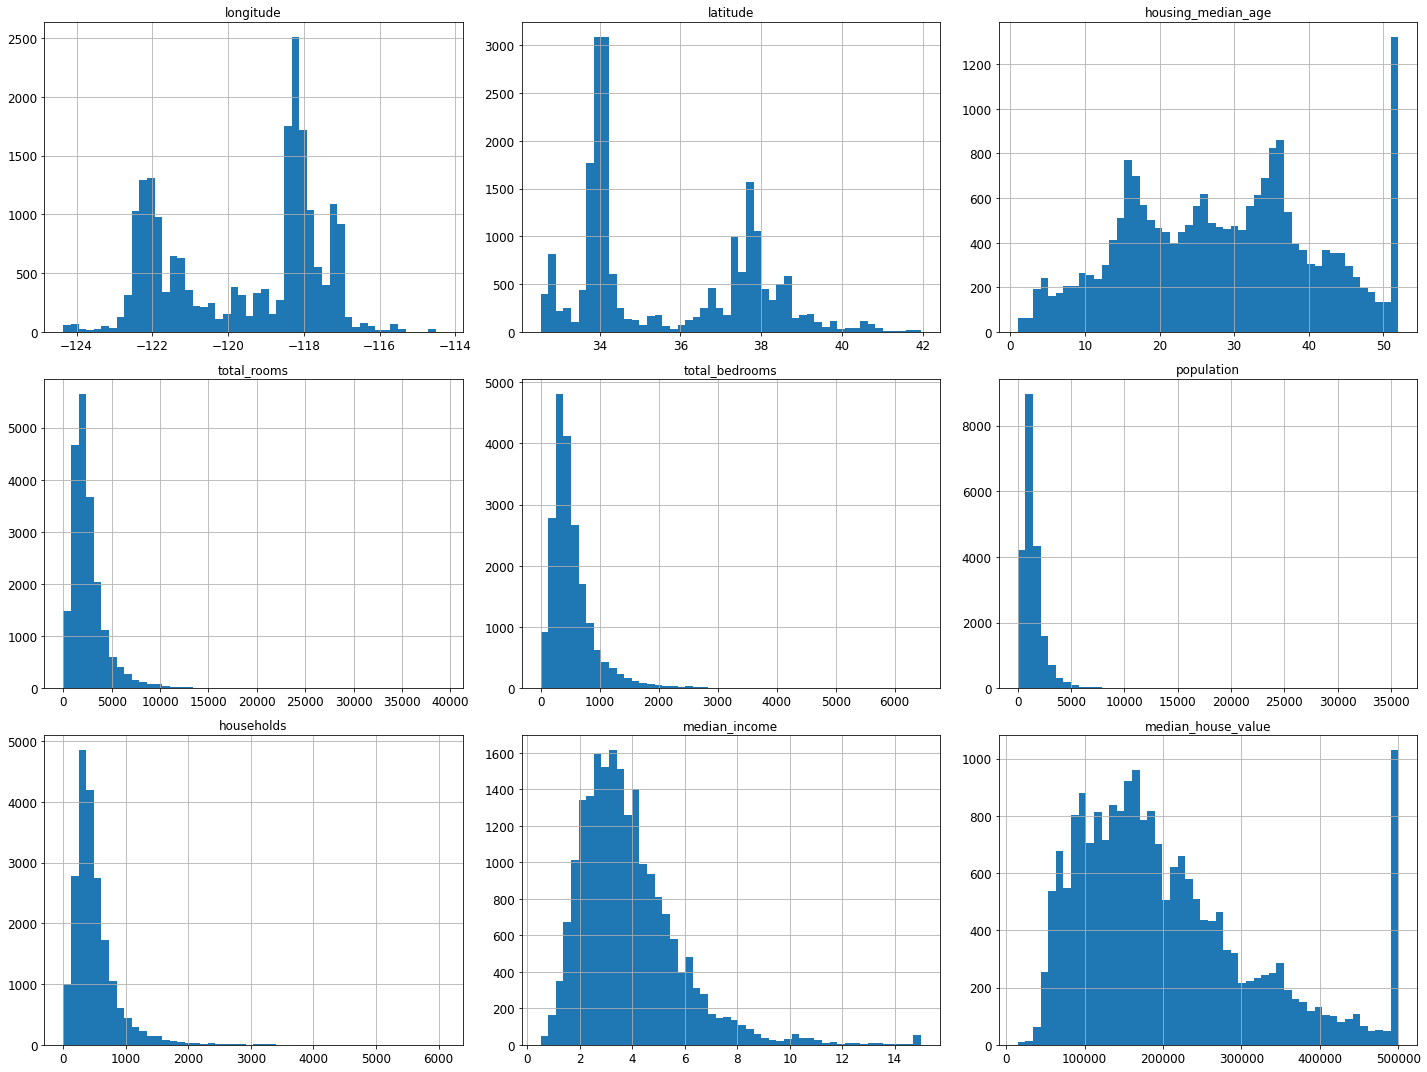

In [9]:
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

## 테스트 세트 만들기

<AxesSubplot:>

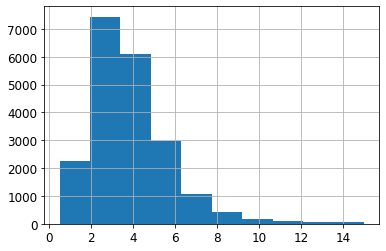

In [10]:
housing["median_income"].hist()

In [11]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [12]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

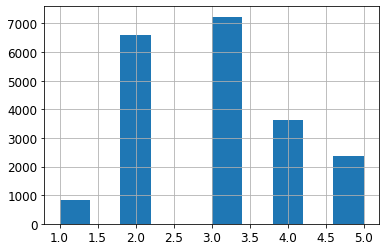

In [13]:
housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split


def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


train_set, test_set = train_test_split(housing, test_size=0.2)
compare_props = pd.DataFrame(
    {
        "Overall": income_cat_proportions(housing),
        "Stratified": income_cat_proportions(strat_test_set),
        "Random": income_cat_proportions(test_set)
    }
).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [18]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040698,2.189781,0.364964
2,0.318847,0.318798,0.328488,3.023857,-0.015195
3,0.350581,0.350533,0.339390,-3.192371,-0.013820
4,0.176308,0.176357,0.175145,-0.659522,0.027480
5,0.114438,0.114341,0.116279,1.608806,-0.084674


In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 데이터 이해를 위한 탐색과 시각화

In [20]:
housing = strat_train_set.copy()

## 지리적 데이터 시각화

In [21]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
filename = "california.png"

그림 저장: california_housing_prices_plot


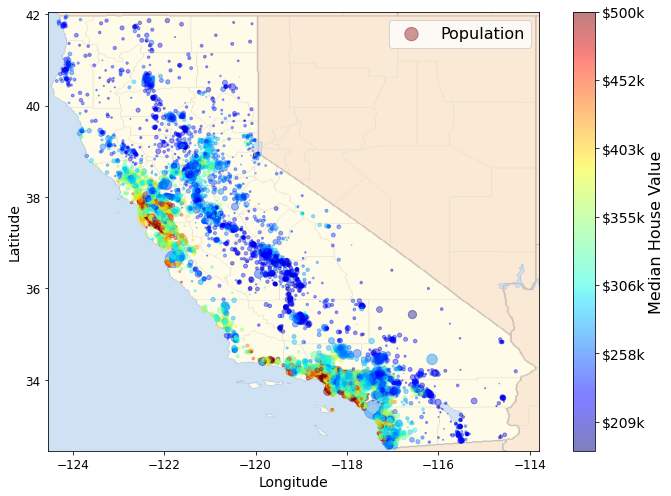

In [22]:
import matplotlib.image as mpimg

california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(10, 7),
    s=housing['population'] / 100,
    label="Population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=False,
    alpha=0.4
)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## 상관관계 조사

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685843
total_rooms           0.136231
housing_median_age    0.106972
households            0.068020
total_bedrooms        0.051904
population           -0.021472
longitude            -0.046566
latitude             -0.143756
Name: median_house_value, dtype: float64

그림 저장: scatter_matrix_plot


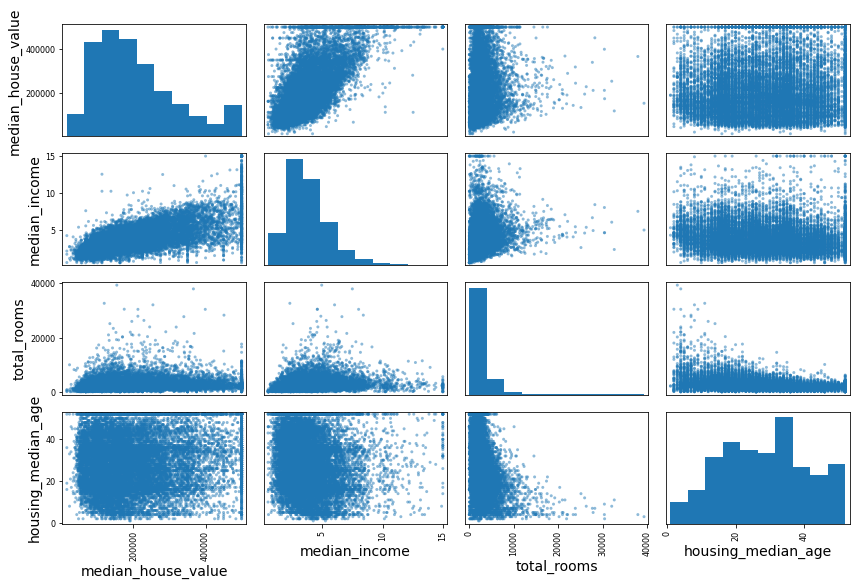

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

그림 저장: income_vs_house_value_scatterplot


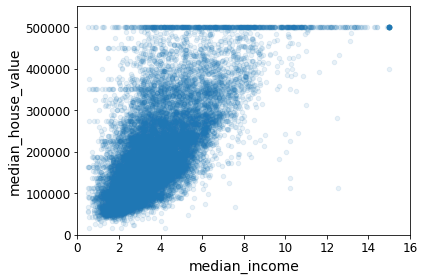

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## 특성 조합으로 실험

In [27]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [28]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685843
rooms_per_household         0.152193
total_rooms                 0.136231
housing_median_age          0.106972
households                  0.068020
total_bedrooms              0.051904
population                 -0.021472
population_per_household   -0.021935
longitude                  -0.046566
latitude                   -0.143756
bedrooms_per_room          -0.247341
Name: median_house_value, dtype: float64

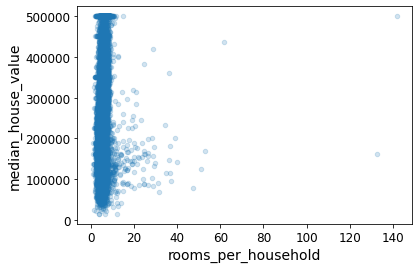

In [29]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.show()

In [30]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000
mean,-119.570186,35.634973,28.651526,2624.399467,536.093240,1419.501151,497.835756,3.866247,206502.727592,5.424048,0.213284,3.101220
std,2.003142,2.136608,12.604769,2176.019354,421.708924,1139.069354,383.329985,1.896035,115060.783123,2.479697,0.058515,11.601492
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1442.000000,294.000000,784.000000,278.000000,2.564300,119400.000000,4.443181,0.175507,2.428905
50%,-118.490000,34.260000,29.000000,2119.500000,433.000000,1161.500000,408.000000,3.531300,179400.000000,5.226663,0.203162,2.815576
75%,-118.010000,37.710000,37.000000,3142.000000,646.000000,1715.250000,603.000000,4.744075,265025.000000,6.052381,0.239898,3.280223
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 머신러닝 알고리즘을 위한 데이터 준비

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)  # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

## 데이터 정제

주택 데이터셋의 복사본을 만든다. 이 때 적어도 하나의 열이 비어 있는 행만 고른다. 이렇게 하면 정확한 동작을 눈으로 쉽게 확인할 수 있다.

In [32]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8530,-118.35,33.90,31.0,1547.0,NaN,956.0,287.0,3.4698,<1H OCEAN
12570,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND
8383,-118.36,33.96,26.0,3543.0,NaN,2742.0,951.0,2.5504,<1H OCEAN
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,<1H OCEAN


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제한다:

In [34]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [35]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1161.5   ,
        408.    ,    3.5313])

각 특성의 중간 값이 수동으로 계산한 것과 같은지 확인해 본다:

In [37]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1161.5   ,
        408.    ,    3.5313])

훈련 세트를 변환한다:

In [38]:
X = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [40]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8530,-118.35,33.90,31.0,1547.0,433.0,956.0,287.0,3.4698
12570,-121.44,38.54,39.0,2855.0,433.0,1217.0,562.0,3.2404
8383,-118.36,33.96,26.0,3543.0,433.0,2742.0,951.0,2.5504
10761,-117.87,33.62,8.0,1266.0,433.0,375.0,183.0,9.8020
19332,-122.91,38.46,18.0,2021.0,433.0,912.0,329.0,4.5000


In [41]:
imputer.strategy

'median'

In [42]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15997,-122.47,37.75,51.0,2713.0,396.0,1090.0,401.0,9.3603
9254,-120.07,36.97,27.0,968.0,240.0,587.0,231.0,1.6071
9191,-118.38,34.30,39.0,1622.0,355.0,903.0,314.0,4.1125
1195,-121.65,39.35,24.0,1003.0,251.0,1098.0,227.0,1.7552
9962,-122.23,38.33,31.0,3440.0,574.0,1538.0,537.0,5.5368


## 텍스트와 범주형 특성 다루기

이제 범주형 입력 특성인 `ocean_proximity`을 전처리한다:

In [43]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
15997,NEAR BAY
9254,INLAND
9191,<1H OCEAN
1195,INLAND
9962,NEAR BAY
8151,<1H OCEAN
12311,INLAND
1624,NEAR BAY
2660,<1H OCEAN
4898,<1H OCEAN


In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 변환기

추가 특성을 위해 사용자 정의 변환기를 만든다:

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names]  # 열 인덱스 구하기


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # 아무것도 하지 않는다

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

`housing_extra_attribs`는 넘파이 배열이기 때문에 열 이름이 없다(사이킷런을 사용할 때 생기는 문제이다). `DataFrame`으로 복원하려면 다음과 같이 할 수 있다:

In [47]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index
)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
15997,-122.47,37.75,51.0,2713.0,396.0,1090.0,401.0,9.3603,NEAR BAY,6.765586,2.718204
9254,-120.07,36.97,27.0,968.0,240.0,587.0,231.0,1.6071,INLAND,4.190476,2.541126
9191,-118.38,34.3,39.0,1622.0,355.0,903.0,314.0,4.1125,<1H OCEAN,5.165605,2.875796
1195,-121.65,39.35,24.0,1003.0,251.0,1098.0,227.0,1.7552,INLAND,4.418502,4.837004
9962,-122.23,38.33,31.0,3440.0,574.0,1538.0,537.0,5.5368,NEAR BAY,6.405959,2.86406


## 변환 파이프라인

수치형 특성을 전처리하기 위해 파이프라인을 만든다:

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder()),
        ("std_scaler", StandardScaler())
    ]
)
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
housing_num_tr

array([[-1.4476765 ,  0.98992903,  1.77307106, ...,  0.54102535,
        -0.03301532, -1.02506833],
       [-0.24952258,  0.62485342, -0.13102788, ..., -0.49748381,
        -0.04827925,  0.51140646],
       [ 0.59417747, -0.62482848,  0.82102159, ..., -0.10422668,
        -0.01943117,  0.07340817],
       ...,
       [ 0.64410055, -0.73715943,  1.85240852, ..., -1.12113072,
        -0.02625688,  4.08414107],
       [ 0.71898517, -0.44229067,  0.2656594 , ...,  0.01175454,
        -0.01295166, -0.08358033],
       [-0.96342263,  1.35500464,  0.66234668, ...,  0.04812474,
        -0.06947061, -0.39455139]])

In [50]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [51]:
housing_prepared

array([[-1.4476765 ,  0.98992903,  1.77307106, ...,  0.        ,
         1.        ,  0.        ],
       [-0.24952258,  0.62485342, -0.13102788, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59417747, -0.62482848,  0.82102159, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.64410055, -0.73715943,  1.85240852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71898517, -0.44229067,  0.2656594 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.96342263,  1.35500464,  0.66234668, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
housing_prepared.shape

(16512, 16)

# 모델 선택과 훈련

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs=-1)

In [56]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")

## 교차 검증을 사용한 평가

In [57]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(
    lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10, n_jobs=-1
)
lin_rmse_scores = np.sqrt(-lin_scores)

In [58]:
def display_scores(scores):
    print(f"점수: {scores}")
    print(f"평균: {scores.mean()}")
    print(f"표준 편차: {scores.std()}")


display_scores(lin_rmse_scores)

점수: [69957.1774094  67896.80998469 65052.83575744 69045.19276202
 71314.30383092 67670.63864707 67519.12168809 75013.41833701
 69250.10504349 65427.99619693]
평균: 68814.75996570708
표준 편차: 2750.8434023840423


In [59]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

점수: [70170.14182019 69129.33766116 70445.16647282 68978.64608548
 73517.9486133  67293.19388757 68637.81454673 69747.46897387
 73668.91687837 68895.68758416]
평균: 70048.4322523645
표준 편차: 1957.2281727049408


In [60]:
forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-1
)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [52073.39926739 49132.39151209 47143.546721   51615.59021569
 51686.00084457 48472.48583443 47519.36497869 48538.54595919
 50418.96744336 48746.6618151 ]
평균: 49534.695459151946
표준 편차: 1699.0523727544041


In [61]:
svm_scores = cross_val_score(
    svm_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-1
)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

점수: [110054.95599684 113885.19335939 110197.39247208 115007.96131928
 110788.44460528 111181.53999512 113745.7435843  107684.41811164
 110818.11667028 107843.37153251]
평균: 111120.71376467208
표준 편차: 2332.1010250705526


In [62]:
pd.Series(forest_rmse_scores).describe()

count       10.000000
mean     49534.695459
std       1790.958454
min      47143.546721
25%      48489.000866
50%      48939.526664
75%      51316.434523
max      52073.399267
dtype: float64

# 모델 세부 튜닝

## 랜덤 탐색

In [63]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {"n_estimators": randint(low=1, high=200), "max_features": randint(low=1, high=8)}
# 다섯 개의 폴드로 훈련하면 총 10*5=50번의 훈련이 일어난다.
rnd_search = RandomizedSearchCV(
    forest_reg, param_distributions=param_distribs, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021549E3BD90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021549E3B760>},
                   scoring='neg_mean_squared_error')

최상의 파라미터 조합은 다음과 같다:

In [64]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 89}

In [65]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=89, n_jobs=-1)

랜덤서치에서 테스트한 하이퍼파라미터 조합의 점수를 확인한다:

In [66]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52160.17474450843 {'max_features': 2, 'n_estimators': 50}
53974.00355083642 {'max_features': 1, 'n_estimators': 194}
50250.402205041726 {'max_features': 3, 'n_estimators': 54}
54284.126380530324 {'max_features': 1, 'n_estimators': 137}
49242.3252007636 {'max_features': 7, 'n_estimators': 57}
54244.91097347507 {'max_features': 1, 'n_estimators': 158}
52169.9470488923 {'max_features': 2, 'n_estimators': 58}
49174.37079084624 {'max_features': 7, 'n_estimators': 89}
50398.609733624784 {'max_features': 3, 'n_estimators': 66}
54236.481496840825 {'max_features': 1, 'n_estimators': 146}


In [67]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.818814,0.412318,1.978279,0.412081,2,50,"{'max_features': 2, 'n_estimators': 50}",-2.810764e+09,-2.732254e+09,-2.768014e+09,-2.517229e+09,-2.775157e+09,-2.720684e+09,1.047374e+08,5
1,2.731460,0.062034,0.203142,0.046354,1,194,"{'max_features': 1, 'n_estimators': 194}",-3.050111e+09,-2.925033e+09,-2.948765e+09,-2.668485e+09,-2.973570e+09,-2.913193e+09,1.293673e+08,7
2,1.237593,0.591357,1.343855,0.510956,3,54,"{'max_features': 3, 'n_estimators': 54}",-2.629810e+09,-2.497097e+09,-2.609005e+09,-2.291756e+09,-2.597847e+09,-2.525103e+09,1.253235e+08,3
3,2.968979,0.190358,0.362528,0.180453,1,137,"{'max_features': 1, 'n_estimators': 137}",-3.079044e+09,-2.964537e+09,-2.974194e+09,-2.693838e+09,-3.022220e+09,-2.946766e+09,1.328395e+08,10
4,2.981480,0.231647,0.821939,0.282933,7,57,"{'max_features': 7, 'n_estimators': 57}",-2.582193e+09,-2.379786e+09,-2.443435e+09,-2.246021e+09,-2.472597e+09,-2.424807e+09,1.108087e+08,2
5,2.265799,0.175125,0.896945,0.356962,1,158,"{'max_features': 1, 'n_estimators': 158}",-3.066198e+09,-2.959695e+09,-2.969656e+09,-2.678907e+09,-3.038095e+09,-2.942510e+09,1.378072e+08,9
6,1.887645,0.240745,1.143838,0.402222,2,58,"{'max_features': 2, 'n_estimators': 58}",-2.830582e+09,-2.744702e+09,-2.714077e+09,-2.523268e+09,-2.795888e+09,-2.721703e+09,1.070714e+08,6
7,3.350257,0.227436,0.903196,0.742887,7,89,"{'max_features': 7, 'n_estimators': 89}",-2.537773e+09,-2.377553e+09,-2.465836e+09,-2.245270e+09,-2.464162e+09,-2.418119e+09,1.002362e+08,1
8,3.040858,0.322157,0.528166,0.169283,3,66,"{'max_features': 3, 'n_estimators': 66}",-2.642268e+09,-2.548690e+09,-2.603474e+09,-2.323415e+09,-2.582252e+09,-2.540020e+09,1.124789e+08,4
9,2.022032,0.573003,0.346902,0.350166,1,146,"{'max_features': 1, 'n_estimators': 146}",-3.070660e+09,-2.968829e+09,-2.987351e+09,-2.673458e+09,-3.007682e+09,-2.941596e+09,1.383893e+08,8


## 최상의 모델과 오차 분석

In [68]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.26738567e-02, 7.00840450e-02, 4.14041217e-02, 1.63105084e-02,
       1.52800473e-02, 1.50539465e-02, 1.42922568e-02, 3.43797437e-01,
       5.08261802e-02, 1.11920915e-01, 7.47038176e-02, 9.23306908e-03,
       1.56327485e-01, 2.44087845e-04, 3.34800110e-03, 4.50022495e-03])

In [69]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3437974365534338, 'median_income'),
 (0.1563274854009015, 'INLAND'),
 (0.11192091500128241, 'pop_per_hhold'),
 (0.07470381759205359, 'bedrooms_per_room'),
 (0.07267385668436481, 'longitude'),
 (0.07008404496821512, 'latitude'),
 (0.050826180211482656, 'rooms_per_hhold'),
 (0.04140412166043079, 'housing_median_age'),
 (0.01631050837863221, 'total_rooms'),
 (0.01528004730397818, 'total_bedrooms'),
 (0.01505394650911703, 'population'),
 (0.01429225676221983, 'households'),
 (0.009233069082900738, '<1H OCEAN'),
 (0.004500224946366531, 'NEAR OCEAN'),
 (0.003348001099536433, 'NEAR BAY'),
 (0.00024408784508431642, 'ISLAND')]

## 테스트 세트로 시스템 평가하기

In [70]:
from sklearn.metrics import mean_squared_error

final_model = rnd_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [71]:
final_rmse

49099.703578873625

테스트 RMSE에 대한 95% 신뢰 구간을 계산한다:

In [72]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))
)

array([46646.68871659, 51435.86506363])

또는 t-점수 대신 z-점수를 사용한다:

In [73]:
m = len(squared_errors)
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46647.427042235446, 51435.19547358435)

## joblib를 사용한 모델 저장

In [74]:
import joblib

joblib.dump(final_model, "final_model.pkl")
model_loaded = joblib.load("final_model.pkl")

## 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가

In [75]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])


class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self

    def transform(self, X):
        return X[:, self.feature_indices_]

이 특성 선택 클래스는 이미 어떤 식으로든 특성 중요도를 계산했다고 가정한다(가령 `RandomForestRegressor`을 사용하여). `TopFeatureSelector`의 `fit()` 메서드에서 직접 계산할 수도 있지만 (캐싱을 사용하지 않을 경우) 그리드서치나 랜덤서치의 모든 하이퍼파라미터 조합에 대해 계산이 일어나기 때문에 매우 느려진다.

선택할 특성의 개수를 지정한다:

In [76]:
k = 5

최상의 k개 특성의 인덱스를 확인해 본다:

In [77]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [78]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

최상의 k개 특성이 맞는지 다시 확인한다:

In [79]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3437974365534338, 'median_income'),
 (0.1563274854009015, 'INLAND'),
 (0.11192091500128241, 'pop_per_hhold'),
 (0.07470381759205359, 'bedrooms_per_room'),
 (0.07267385668436481, 'longitude')]

좋다. 이제 이전에 정의한 준비 파이프라인과 특성 선택기를 추가한 새로운 파이프라인을 만든다:

In [80]:
preparation_and_feature_selection_pipeline = Pipeline(
    [("preparation", full_pipeline), ("feature_selection", TopFeatureSelector(feature_importances, k))]
)

In [81]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

처음 3개 샘플의 특성을 확인해 보겠다:

In [82]:
housing_prepared_top_k_features[:3]

array([[-1.4476765 ,  2.89774176, -0.03301532, -1.02506833,  0.        ],
       [-0.24952258, -1.19154731, -0.04827925,  0.51140646,  1.        ],
       [ 0.59417747,  0.12988189, -0.01943117,  0.07340817,  0.        ]])

최상의 k개 특성이 맞는지 다시 확인한다:

In [83]:
housing_prepared[:3, top_k_feature_indices]

array([[-1.4476765 ,  2.89774176, -0.03301532, -1.02506833,  0.        ],
       [-0.24952258, -1.19154731, -0.04827925,  0.51140646,  1.        ],
       [ 0.59417747,  0.12988189, -0.01943117,  0.07340817,  0.        ]])

성공이다!  :)

## 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들기

In [84]:
prepare_select_and_predict_pipeline = Pipeline(
    [
        ("preparation", full_pipeline),
        ("feature_selection", TopFeatureSelector(feature_importances, k)),
        ("final_model", final_model)
    ]
)

In [85]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([7.26738567e-02, 7.00840450e-02, 4.14041217e-02, 1.63105084e-02,
       1.52800473e-02, 1.50539465e-02, 1.42922568e-02, 3.43797437e-01,
       5.08261802e-02, 1.11920915e-01, 7.47038176e-02, 9.23306908e-03,
       1.56327485e-01, 2.44087845e-04, 3.34800110e-03, 4.50022495e-03]),
                                    k=5)),
                ('final_model',
                 RandomForestRegressor(max_features=7, n_estimators=89,
                                       n_jobs=-1))])

몇 개의 샘플에 전체 파이프라인을 적용해 보겠다:

In [86]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]
print(f"Predictions:\t{prepare_select_and_predict_pipeline.predict(some_data)}")
print(f"Labels:\t\t{list(some_labels)}")

Predictions:	[498874.02247191  61548.31460674 201149.43820225 105629.21348315]
Labels:		[500001.0, 55000.0, 183000.0, 86400.0]


전체 파이프라인이 잘 작동한다.

## `GridSearchCV`를 사용해 준비 단계의 옵션을 자동으로 탐색하기

**경고**: 사용하는 하드웨어에 따라 다음 셀을 실행하는데 45분 또는 그 이상 걸릴 수 있다.

**노트**: 아래 코드에서 훈련 도중 경고를 피하기 위해 `OneHotEncoder`의 `handle_unknown` 하이퍼파라미터를 `'ignore'`로 지정했다. 그렇지 않으면 `OneHotEncoder`는 기본적으로 `handle_unkown='error'`를 사용하기 때문에 데이터를 변활할 때 훈련할 때 없던 범주가 있으면 에러를 낸다. 기본값을 사용하면 훈련 세트에 모든 카테고리가 들어 있지 않은 폴드를 평가할 때 `GridSearchCV`가 에러를 일으킨다. `'ISLAND'` 범주에는 샘플이 하나이기 때문에 일어날 가능성이 높다. 일부 폴드에서는 테스트 세트 안에 포함될 수 있다. 따라서 이런 폴드는 `GridSearchCV`에서 무시하여 피하는 것이 좋다.

In [87]:
from sklearn.model_selection import GridSearchCV

full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'
param_grid = [
    {
        "preparation__num__imputer__strategy": ["mean", "median", "most_frequent"],
        "feature_selection__k": list(range(1, len(feature_importances) + 1))
    }
]
grid_search_prep = GridSearchCV(
    prepare_select_and_predict_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1
)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       1.56327485e-01, 2.44087845e-04, 3.34800110e-03, 4.50022495e-03]),
                                                           k=5)),
                                       ('final_model',
                                        RandomForestRegressor(max_features=7,
                                                              n_estimators=89,
                                                              n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [88]:
grid_search_prep.best_params_

{'feature_selection__k': 16, 'preparation__num__imputer__strategy': 'mean'}

최상의 `Imputer` 정책은 `mean`이고 모든 특성이 유용하다(16개 중 16개).